# Inference 

This notebook is meant to show in an accessible way how to perform inference using the trained model. 
The model used here is just an example trained for 1 epoch on just 3 target channels (DNA, cell membrane, and mitochondria).

In [1]:
import zarr
import matplotlib.pyplot as plt

from inference import inference
from src.utils.utils import get_device

In [2]:
ckpt_path = "trained_models/Gen_in-focus-centre_WGANGP_advT_True_3D_3D_5e-05lrG_5e-05lrD_['TOMM20'].tar"
output_dir = 'output_images/'
device = get_device(0)
output_format = 'tiff'
img_path = '/mnt/storage_nvme/organvision/denoised_hipsc_single_cell_dataset/TOMM20/1000.zarr'
source = 3

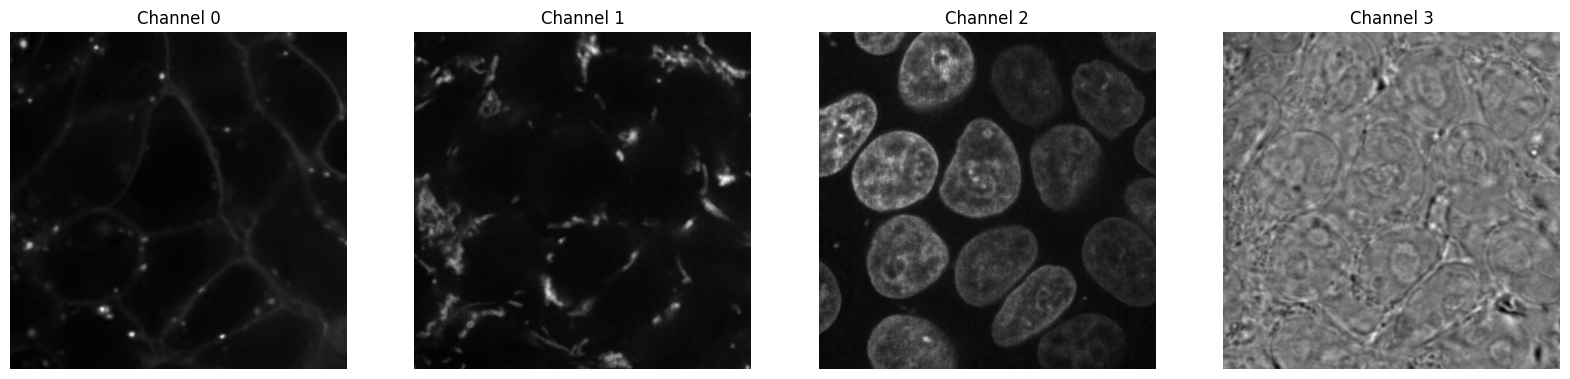

In [3]:
img = zarr.open(img_path)
section = ((16,64,64),(32,512,512))

fig, ax = plt.subplots(1, img.shape[0], figsize=(20, 10))
for channel in range(img.shape[0]):
    ax[channel].imshow(img[channel, 
        (section[0][0]+section[1][0])//2, #central slice
        section[0][1]:section[1][1],
        section[0][2]:section[1][2]
        ], cmap = 'gray') # original image
    ax[channel].axis('off')
    ax[channel].set_title(f'Channel {channel}')
plt.show()

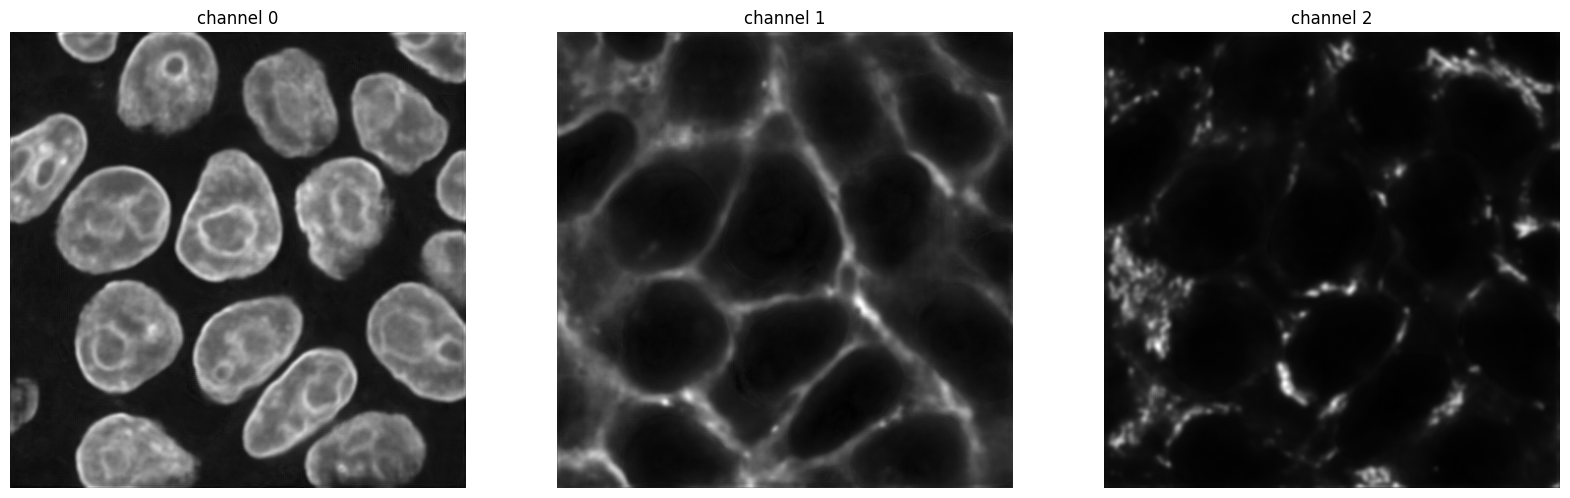

In [4]:
output_img = inference(img_path, ckpt_path, None, output_format, section, source, device)
fig,ax = plt.subplots(1,output_img.shape[0], figsize=(20,10))
for channel_output in range(output_img.shape[0]):
    ax[channel_output].imshow(output_img[channel_output,8].cpu().numpy(), cmap='gray') #prediction
    ax[channel_output].axis('off')
    ax[channel_output].set_title(f'channel {channel_output}')
plt.show()